<details>
<summary>Notes</summary>
There are 2 types of KNN, KNeighborsClassifier & KNeighborsRegressor (we don't have in this program?).<br>
In both, X must be continuous or at least numerical.<br>
y must be categorical in Classifier model & continuous in Regression model

KNN has limitations that affect its use in certain scenarios:
- Doesn't scale well with large datasets (needs to compute distances to all points)
- Requires significant memory (must store all training data)
- Sensitive to irrelevant features
- Can be computationally expensive during prediction

For these reasons, while KNN is used in real-world applications, it's often:
- Combined with other techniques
- Used on smaller, preprocessed datasets
- Implemented with optimizations like spatial indexing
- Used when interpretability is important
- Applied in scenarios where the training data size is manageable

Here are some real-world applications:

1. Recommendation Systems
   - Netflix movie recommendations based on similar users' preferences
   - Product recommendations in e-commerce based on similar customer behaviors
   - Music recommendations based on listening patterns

2. Financial Services
   - Credit scoring by comparing loan applicants to similar past cases
   - Fraud detection by identifying unusual transactions compared to normal patterns

3. Healthcare
   - Medical diagnosis by comparing patient symptoms to similar past cases
   - Pattern recognition in medical imaging
   - Gene expression classification
</details>

In [14]:
import pandas as pd

In [15]:
from urllib.request import urlretrieve

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
output_file = 'teleCust1000t.csv'

import os
if not os.path.exists(output_file):  # if the file doesn't exist in this directory
    urlretrieve(url, output_file)
else:
    pass

In [16]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [17]:
# number of each customer category type
df['custcat'].value_counts().sort_index()
# 1: Basic-service
# 2: E-Service
# 3: Plus Service
# 4: Total Service

custcat
1    266
2    217
3    281
4    236
Name: count, dtype: int64

<Axes: >

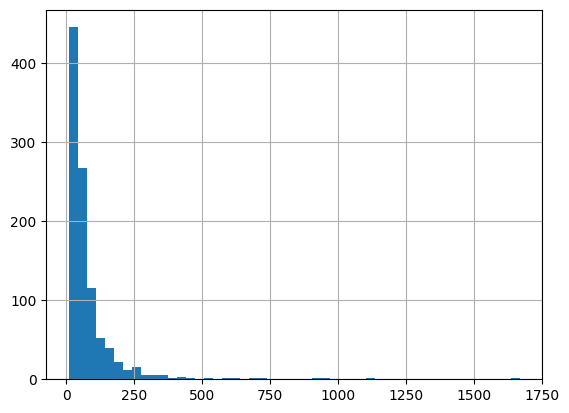

In [18]:
df['income'].hist(bins=50)

In [19]:
df.columns
# custcat is the target variable

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [20]:
# we used all variables as continues here, so check the result and compare it with the later approach
from sklearn.preprocessing import StandardScaler

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
# for KNN we can use both pandas dataframe (here) or numpy array (by adding .values)
# X must by 2D
y = df['custcat'].values

# standardize X
X = StandardScaler().fit_transform(X.astype(float))  # gives a numpy, check below for situation we should convert it to pandas
# in KNN (which is based on the distance of data points), Data Standardization is important, it gives the data zero mean and 1 std and variance
# X.astype(float): to conver int to float. StandardScaler needs float numbers to work properly



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"{X_train.shape} = {y_train.shape}")
print(f"{X_test.shape} = {y_test.shape}")

(800, 11) = (800,)
(200, 11) = (200,)


In [22]:
# first we have to chode the best n_neighbors

# get the sqrt(row numbers(sample numbers)) -> if it is not an odd number consider -1 or + 1 to make it odd
# now put that number in the model and try all odd numbers above and below that number to check which one has the maximum TEST set accuracy
# there are more professinal ways, but this is the best I think

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# for n_neighbor, I started with 31 (sqrt(1000 [number of rows])) then examine odd numbers around for highest test accuracy
knn_model = KNeighborsClassifier(n_neighbors=39).fit(X_train, y_train)


print('Train set Accuracy:', metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, knn_model.predict(X_test)))

Train set Accuracy: 0.43375
Test set Accuracy: 0.385


<details>
<summary>Accuracy explanation</summary>
Calculate the Accuracy of Train and Test datasets (we should calculate both)

- Training Accuracy:

Helps you understand how well your model fits the training data

In KNN, training accuracy is often artificially high because each point perfectly "knows" its own nearest neighbors

- Test Accuracy:

Shows how well your model generalizes to new, unseen data

More reliable indicator of real-world performance

---
If train accuracy is much higher than test accuracy, your model is likely overfitting

If both accuracies are low, your model might be underfitting

If both accuracies are similar and reasonably high, your model is likely well-balanced

---

The definition of "good" accuracy for a K-Nearest Neighbors (KNN) model really depends on several factors:

- The complexity of your problem - For binary classification of well-separated data, you might expect 90%+ accuracy, but for complex multi-class problems, even 70% could be considered good.

- The baseline/random performance - For a balanced binary classification, random guessing would give 50% accuracy. A "good" model should significantly outperform this baseline. For a 10-class problem, beating 10% (random) by a good margin would be your starting point.

- Industry standards and requirements - In medical diagnosis, you might need 95%+ accuracy, while for product recommendations, 70% might be acceptable.

- Comparison to other models - If other models (like Random Forest or SVM) achieve 75% accuracy on your dataset, then getting 78% with KNN could be considered good.
</details>

In [24]:
# not good here ^, because of the categorical variables like ['tenure', 'age', 'address', 'income', 'employ', 'reside']

# Train accuracy of 54.37% is barely better than random guessing (%50)
# Test accuracy of 32.5% is even worse than random guessing
# The large gap between train and test accuracy (54.37% vs 32.5%) suggests overfitting

# for KNN we need to encode categorical variables properly

In [25]:
# we separate continues and categorical here
# in knn, like linear regression, we use pd.get_dummies() for categoricals
# but in fact, in linear reg and knn it's better to use pd.get_dummies for nominal categoricals and use preprocessing.LabelEncoder() for ordinal categoricals
# unike tree based models that is always safe to use .LabelEncoder()
X2 = df[['tenure', 'age', 'income', 'employ']]
X2_cat = df[['region', 'marital', 'ed', 'retire', 'gender']]

y2 = df['custcat'].values

# stnadardization is just for continues variables
X2_scaled = StandardScaler().fit(X2).transform(X2.astype(float))
# convert numpy to pandas
X2_pandas = pd.DataFrame(X2_scaled, columns=X2.columns)
# columns=X2.columns: to specifying the column names, instead of being just (0, 1, 2, 3) 

# encode catgoricals
X2_cat_encoded = pd.get_dummies(X2_cat, drop_first=True)
X2 = pd.concat([X2, X2_cat_encoded], axis=1)
X2 = X2.values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2_knn = KNeighborsClassifier(n_neighbors=41).fit(X2_train, y2_train)

print('Train set Accuracy:', metrics.accuracy_score(y2_train,model2_knn.predict(X2_train)))
print('Test set Accuracy:', metrics.accuracy_score(y2_test, model2_knn.predict(X2_test)))

Train set Accuracy: 0.42125
Test set Accuracy: 0.39


In [26]:
# almost didn't change :))))
# I think i had to include only the ones with positive relationship??